<a href="https://colab.research.google.com/github/monalisapatra26/ML4Science/blob/main/Classification/Implementing_KNN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing KNN from Scratch

# Overview

Suppose you are shown an image, and you want to identify if it is a Banana or a Mango. Formally, this task is known as *Classification*. As you are "classifying" the shown object (fruit) into Banana or Mango. <br/>

**Think**: What is the most naive method you can come up with to perform classification? (Think about this, without assuming any ML related priors)

The most naive way to classify a given object O as X or Y, would be to look at the features of O, and see if those features are closer to the features of X or to the features of Y. This is something which we do all the time, without realising. For example, when we guess a person's gender, we look at their facial/body features and see if which gender's features do they resemble more?

Now, how do we implement this in code?

What we will do to implement this in code is that we will first look at the features of the given object of interest, and then find it's "similarity" to all "known" objects (along with their features and labels).

## KNN

### What is KNN ?

K-NN (K- Nearest Neighbours) is a classification technique where the output is a class membership.
An object is classified by a **plurality vote of its neighbors**, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

### What is so unique about KNN ?
First off, KNN is a **supervised learning** algorithm, ie, the idea is to learn a function that can map an input to an output given some example pairs.

It is a **non-parametric** algorithm, since it doesn't assume anything about the form of the mapping function, which makes it very flexible to use. Certain algorithms are parametric (such as Naive Bayes), which are constrained as they require a specified form. KNN can, thus, be a good algorithm to try if the form is unknown.

Moreover, KNN is an **instance-based algorithm**, since it compares new problems/inputs with those which were seen during model training and that were stored in memory.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter
from scipy import stats

In [ ]:
# After running this file, upload the IRIS data CSV file here.
# You can download it from here: https://www.kaggle.com/datasets/uciml/iris?resource=download
#from google.colab import files
#uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
#df = pd.read_csv('Iris.csv')
df = pd.read_csv('https://raw.githubusercontent.com/monalisapatra26/ML4Science/main/Classification/Iris.csv')
df = df.drop(columns='Id') # Drop the column containing the label "id"
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
le = preprocessing.LabelEncoder() # Preprocess data.
orig_species = df['Species']
le.fit(df['Species'])
df['Species']=le.transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = np.array(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
y = np.array(df['Species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [ ]:
# def normalize_data(x):
#     x = (x - x.min()) / (x.max() - x.min())
#     return x

In [ ]:
def knn_vanilla(X_train, y_train, test_pt):
    distances = np.sum(np.square(test_pt - X_train), axis=1)
    # We compute the square of the euclidean distance between all train points, and the given test point
    # If you are not familiar with vectorized numpy codes, please try out each sub-part of the above line
    # individually to understand what each part does
    nn_idx = np.argmin(distances)
    nn_label = y_train[nn_idx]
    return nn_label
def predict_vanilla(X_train, y_train, X_test):
    preds = []
    for test_pt in X_test:
        preds.append(knn_vanilla(X_train, y_train, test_pt))
    return np.array(preds)

In [ ]:
preds = predict_vanilla(X_train, y_train, X_test)
accuracy = accuracy_score(y_test, preds)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 96.0 %


**Is there any problem with this implementation**?

Yes. Right now, we are only considering a single nearest neighbour of a given data point. While this would work in an ideal world, the real world is filled with noise. Consider the following example:

- Suppose you have a point x = [5,5] for which you want to predict it's label (label-1 or label-2)
- Consider that it's five nearest neighbour are: point-1: [6,6] with label label-1, point-2: [4,4] with label label-1, point-3: [4,6] with label label-1, point-4: [6,4] with label label-1, and point-5: [5.5, 5.5] with label label-2.

- Now, you can see that the point x is sorrounded by points with label-1. Therefore, it's label should most probably be label-1. However, what will our vanilla KNN algorithm predict for this ?

- The vanilla KNN will predict label-2, because of the one point with label-2, even though the probability of the point x having label-1 is higher

- Can such a case arise in a real life scenario? When?

- Yes, such a case can arise in a real life scenario, as we have some outliers/noisy points in the real world. So, point-5 which had features similar to those of label-1, but still actually  had label-2 is an example of outliers or noise found in the real-world data. A real life example of this can be a very short person in a family with all tall people.

**So, let's implement our improved KNN**

In [ ]:
def knn_improved(X_train, y_train, test_pt, K):
    distances = np.sum(np.square(test_pt - X_train), axis=1)
    # We compute the square of the euclidean distance between all train points, and the given test point
    # If you are not familiar with vectorized numpy codes, please try out each sub-part of the above line
    # individually to understand what each part does

    # nn_idx = np.argmin(distances)
    nn_idxs = np.argpartition(distances, K)[:K] # Argpartition partition the array into two parts such
    # that the K smallest elements of the array occupy the first K places
    # arr[:K] returns the first K elements of the array
    # an alternate conceptually simpler way to do this can be to just sort the array in ascending order, and
    # then choose the first K labels
    nn_labels = y_train[nn_idxs] # Returns the y_train values for all the values in the nn_idxs array
    nn_label = stats.mode(nn_labels).mode[0] # Choose the most recurring label from the nearest neighbour labels
    return nn_label
def predict_improved(X_train, y_train, X_test, K=5):
    preds = []
    for test_pt in X_test:
        preds.append(knn_improved(X_train, y_train, test_pt, K))
    return np.array(preds)

In [ ]:
preds = predict_improved(X_train, y_train, X_test)
accuracy = accuracy_score(y_test, preds)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 96.0 %


<ipython-input-9-970e47f905b4>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nn_label = stats.mode(nn_labels).mode[0] # Choose the most recurring label from the nearest neighbour labels


**Why does the accuracy not increase?**

This is because the IRIS dataset is one very simple dataset. If we take a more complex dataset, or add some noise to the dataset, we should be able to see that choosing top K nearest neighbours is an important factor

**Is something still missing?**

- Consider a dataset with heights of people (in meters) and weights of people (in Kgs).

- In such a dataset, when we calculate the distance between a given test point, and known training points, the values of weights will dominate the distance computation. Whereas the values of height won't play a big role.

- For example, consider person-1 with weight 80 Kgs and height 1.8m; person-2 with weight 79 Kgs and height 1.8m; person-3 with weight 80 kgs and height 1.5m

- In this dataset, clearly person-1 and person-2 have more similar physical features to each other (they have the same height, and only a 5 Kg difference in their weights, whereas person-1 and person-2 have a 1 feet difference in their heights). However, KNN will predict person-1 and person-3 to be closer (you are encouraged to try this out for yourself)

- Why does this anomaly happen? It happens because the model does't realise that the usual variance of weights is much higher than heights and hence a 0.3 meter difference in height is much more than a 1 KG difference in weight. The model just sees everything as numbers, and sees that ($80 - 79 = 1$) is a greater difference than ($1.8 - 1.5 = 0.3$), and gives results accordingly

- How can this be fixed?

- Normalize all data points to the range of 0 and 1

In [ ]:
def normalize_data(x):
    x = (x - x.min()) / (x.max() - x.min())
    return x

In [ ]:
X_train_norm = normalize_data(X_train)
X_test_norm = normalize_data(X_test)

In [ ]:
preds = predict_improved(X_train, y_train, X_test)
accuracy = accuracy_score(y_test, preds)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 96.0 %


<ipython-input-9-970e47f905b4>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nn_label = stats.mode(nn_labels).mode[0] # Choose the most recurring label from the nearest neighbour labels


**It still doesn't lead to any improvement in accuracy in this case as we already started out with very high accuracy for the vanilla case, since IRIS dataset is a simple one. But for more complex examples, normalization is needed**

# Discussion?
- How do you think the values of K effect performance of KNN? What are the pros and cons of choosing small and large K values?
- We chose euclidean distance to compute distance in our example. Is it always the best choice ?
- Read [this](https://www.ibm.com/in-en/topics/knn) for details on this

## How to decide the appropriate distance metric?

1. **Euclidean distance**: The most widely used metric in KNN classification problems, since it calculates the straight line distance between two points.

2. **Manhattan distance**: In some cases, Manhattan distance maybe preferable over Euclidean distances. For eg: For data with high dimensionality, Manhattan distance maybe more useful. When Euclidean distance is defined using many coordinates, there is not a lot of difference in the distances between different pairs of points. This is due to the **Curse of Dimensionality**, ie, "*when the dimensionality increases, the volume of the space increases so fast that the available data become sparse*".
Manhattan distance is a more appropriate metric to use if the data is, for example, in the form of a grid. For instance, if the data consists of several houses that are arranged in the form of a grid and connected by roads, Euclidean distance is not an appropriate indicator of the distance between the houses, as in real-life, one would take the roads to travel between two points, thus making Manhattan distance a more suitable metric.

3. **Cosine Similarity**: Cosine similarity is commonly used in text-analytics and document comparison problems. It is also used in collaborative filtering-based recommendation systems.  It is used when the magnitude of the vectors is not of importance.

4. **Hamming Distance**: It is commonly used to measure the distance between categorical variables.

5. **Jaccard Index**: The Jaccard index is often used in applications where binary data is used. It can also be used in text similarity analysis to measure how much word choice overlap there is between documents

## Using sklearn for KNN calculation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=5)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 96.0 %


# Visualizing Data

We will look into something called **Voronoi** diagrams.

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this session, we're explaining it after you've applied KNN.

### Voronoi Diagrams

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.

Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

## Plotting Voronoi Regions

In [ ]:
from shapely.geometry import MultiPoint, Point, Polygon
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.
    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.
    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.
    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

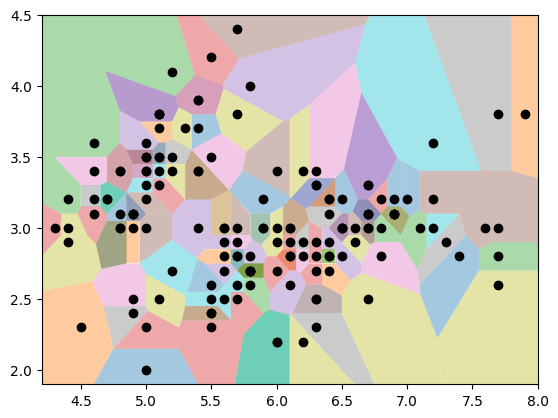

In [ ]:
## Plotting Voronoi regions for the Iris dataset
points = []
xpts = np.array(df['SepalLengthCm'])
ypts = np.array(df['SepalWidthCm'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Understanding the Decision Boundaries

So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?

## Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()

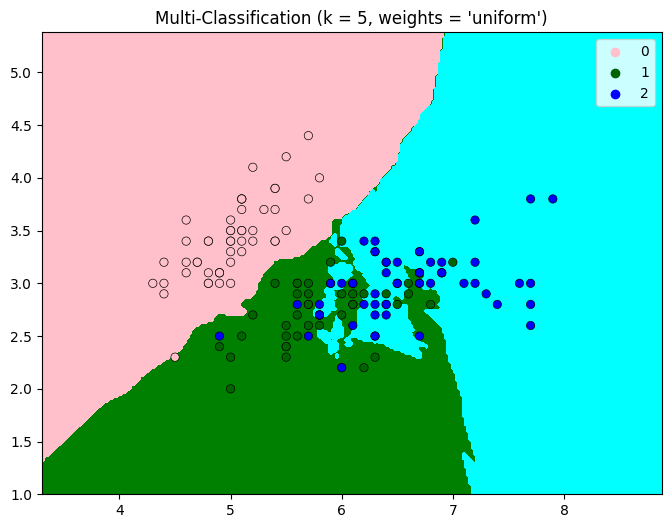

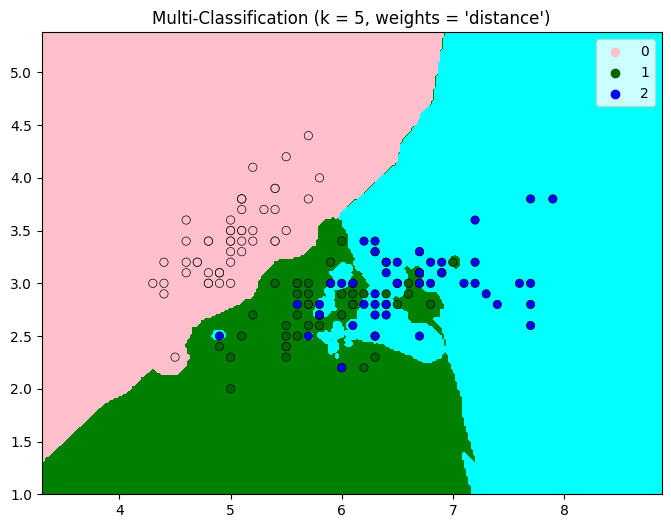

In [ ]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,5)